In [2]:
import requests
import json
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [3]:
csv_path = "../raw_covid_data/DS-C-19-STATES.csv"
cov_states_df  = pd.read_csv(csv_path, encoding="utf-8")

In [4]:
cov_states_df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,36380,399,10,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,157566,12376,504,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,93701,4923,102,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,220612,14566,704,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,1339316,81795,3334,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [5]:
total_tested = cov_states_df['Tested'].sum()
total_infected = cov_states_df['Infected'].sum()
total_deaths = cov_states_df['Deaths'].sum()
total_pop = cov_states_df['Population'].sum()
total_beds = cov_states_df['ICU Beds'].sum()
total_GDP = cov_states_df['GDP'].sum()
total_physicians = cov_states_df['Physicians'].sum()
total_hospitals = cov_states_df['Hospitals'].sum()
total_health_spending = cov_states_df['Health Spending'].sum()

state_analysis = pd.DataFrame({"State": cov_states_df['State'],
                               "Population": cov_states_df['Population'],
                               "% of Tested": (cov_states_df['Tested']/total_tested)*100,
                               "% of Infected": (cov_states_df['Infected']/total_infected)*100,
                               "% of Deaths": (cov_states_df['Deaths']/total_deaths)*100,
                               "% of Population": (cov_states_df['Population']/total_pop)*100,
                               "% of ICU Beds": (cov_states_df['ICU Beds']/total_beds)*100,
                               "% of GDP": (cov_states_df['GDP']/total_GDP)*100,
                               "% of Physicians": (cov_states_df['Physicians']/total_physicians)*100,
                               "% of Hospitals": (cov_states_df['Hospitals']/total_hospitals)*100,
                               "% of Health Spending": (cov_states_df['Health Spending']/total_health_spending)*100,
                                })

In [6]:
state_analysis

,State,Population,% of Tested,% of Infected,% of Deaths,% of Population,% of ICU Beds,% of GDP,% of Physicians,% of Hospitals,% of Health Spending
0,Alaska,734002,0.295928,0.026257,0.011654,0.221539,0.159119,2.334072,0.188999,0.404002,2.603662
1,Alabama,4908621,1.281700,0.814419,0.587378,1.481539,2.049821,1.441765,1.214071,1.943055,1.713418
2,Arkansas,3038999,0.762199,0.323964,0.118874,0.917243,0.978780,1.353606,0.711234,1.692959,1.743305
3,Arizona,7378494,1.794539,0.958535,0.820465,2.227006,2.084587,1.532188,1.771221,1.596768,1.518332
4,California,39937489,10.894491,5.382628,3.885554,12.054090,9.811866,2.365956,11.231131,6.906503,1.776486
5,Colorado,5845526,1.072411,1.479458,1.464950,1.764320,2.135398,2.036817,1.443258,1.712197,1.601167
6,Connecticut,3563077,1.509088,2.528937,4.046384,1.075422,0.901226,2.434092,1.552281,0.615621,2.320092
7,District of Columbia,720687,0.320283,0.489204,0.466173,0.217521,0.419859,6.385643,0.730731,0.192382,2.810750
8,Delaware,982895,0.358986,0.528885,0.354292,0.296661,0.248706,2.463139,0.313142,0.134667,2.413047
9,Florida,21992985,5.542060,3.006296,2.391469,6.638009,7.493281,1.540574,5.620141,4.174683,1.900504


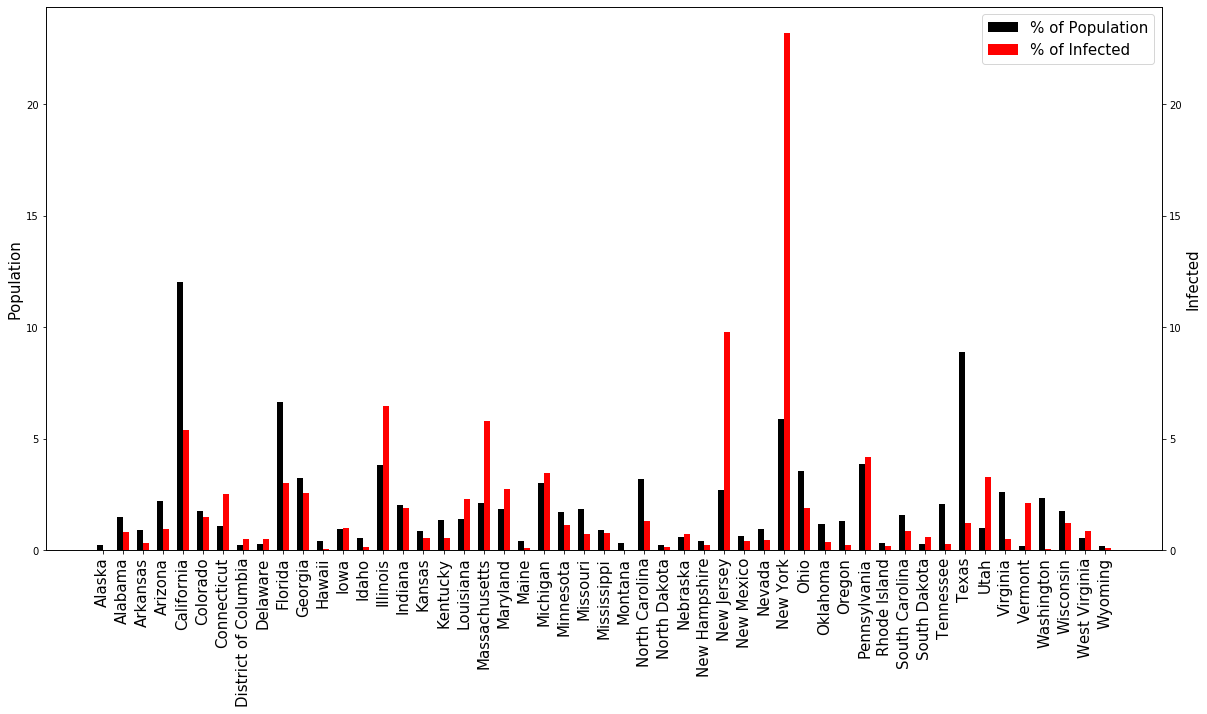

<Figure size 432x288 with 0 Axes>

In [7]:
# set variables for plotting
pop_inf = plt.figure(figsize=(20,10))
x = np.arange(51)
ax1 = pop_inf.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop =ax1.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax2 = ax1.twinx()
# plot % of infected
inf =ax2.bar(x + w, state_analysis['% of Infected'], width=w,color='r',align='center')

# Set legend labels
plt.legend([pop, inf],['% of Population', '% of Infected'], fontsize=15)

ax1.set_ylabel('Population', fontsize=15)
ax2.set_ylabel('Infected', fontsize=15)

# set limits
ax1.set_ylim(0,1.05*state_analysis['% of Infected'].max())
ax2.set_ylim(0,1.05*state_analysis['% of Infected'].max())

plt.show()
plt.savefig('../plot_images/popVinf.png')

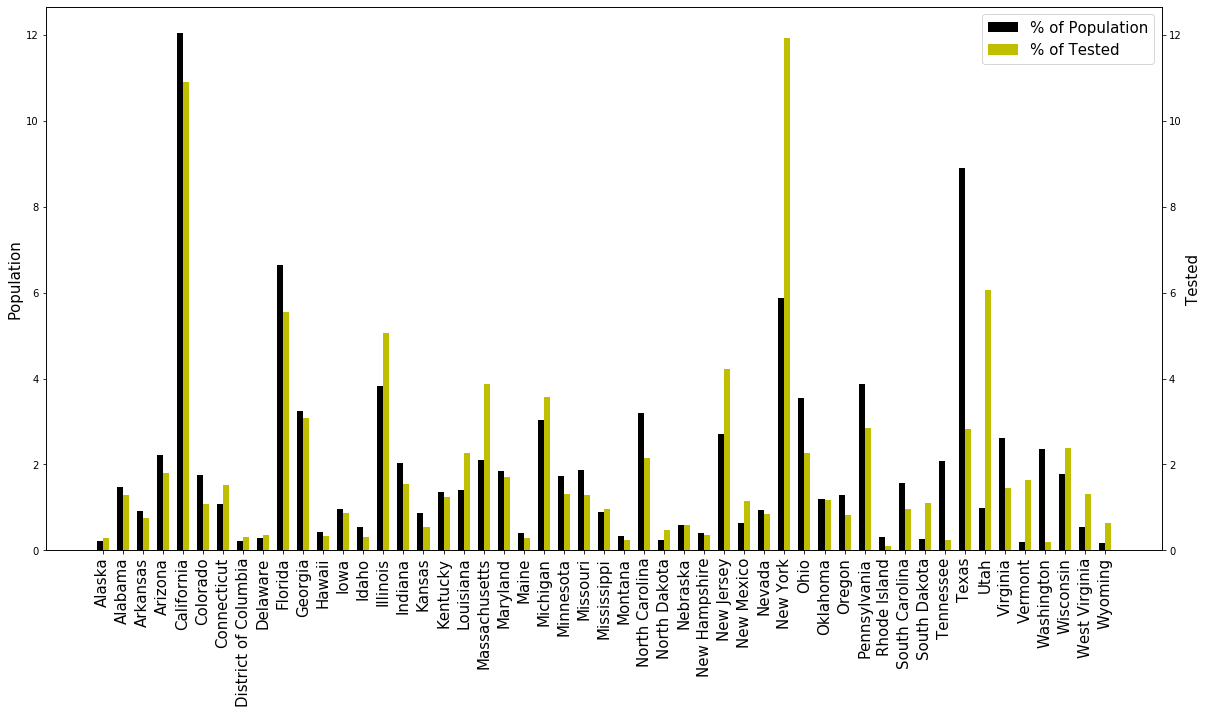

<Figure size 432x288 with 0 Axes>

In [8]:
# set variables for plotting
pop_test = plt.figure(figsize=(20,10))
x = np.arange(51)
ax3 = pop_test.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop2 =ax3.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax4 = ax3.twinx()
# plot % of infected
test =ax4.bar(x + w, state_analysis['% of Tested'], width=w,color='y',align='center')

# Set legend labels
plt.legend([pop2, test],['% of Population', '% of Tested'], fontsize=15)

ax3.set_ylabel('Population', fontsize=15)
ax4.set_ylabel('Tested', fontsize=15)

# set limits
ax3.set_ylim(0,1.05*state_analysis['% of Population'].max())
ax4.set_ylim(0,1.05*state_analysis['% of Population'].max())

plt.show()
plt.savefig('../plot_images/popVtested.png')

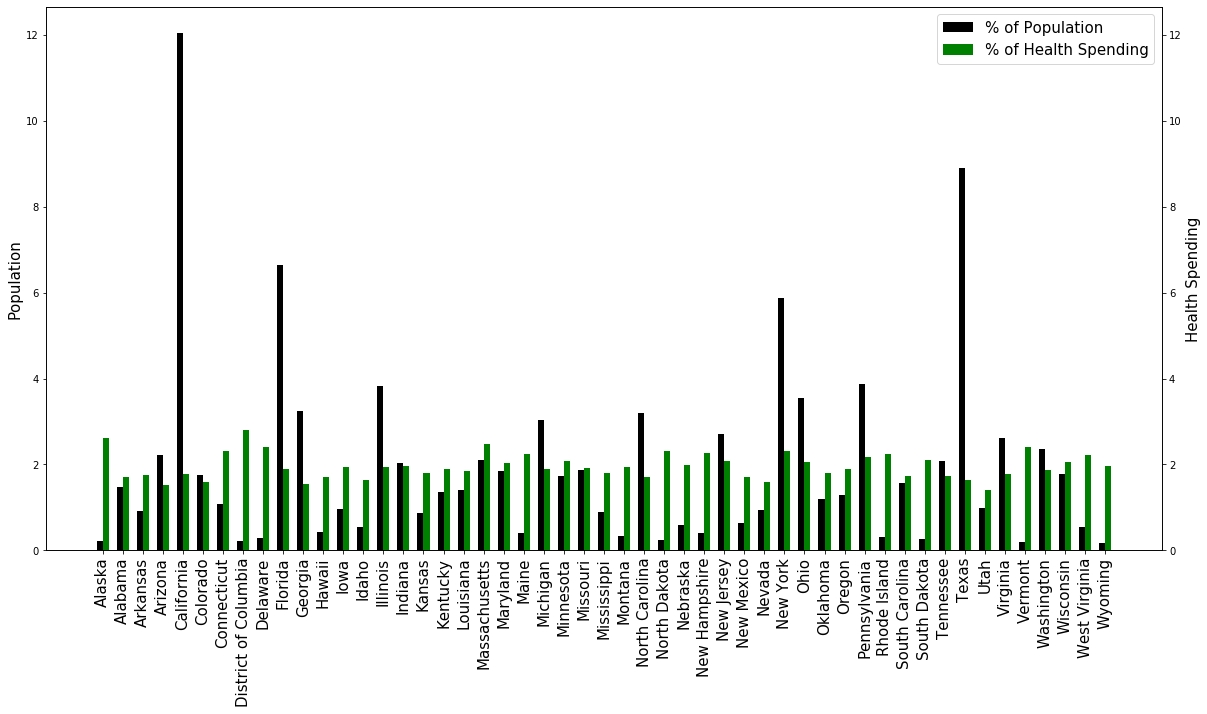

<Figure size 432x288 with 0 Axes>

In [9]:
# set variables for plotting
pop_test = plt.figure(figsize=(20,10))
x = np.arange(51)
ax5 = pop_test.add_subplot(1,1,1)
w = 0.3

# will label the bars on x axis with the respective state names.
plt.xticks(x + w /2, state_analysis['State'], rotation='vertical', fontsize=15)
# plot % of population
pop3 =ax5.bar(x, state_analysis['% of Population'], width=w, color='black', align='center')
# plot data that share the same x axis
ax6 = ax5.twinx()
# plot % of infected
test =ax6.bar(x + w, state_analysis['% of Health Spending'], width=w,color='g',align='center')

# Set legend labels
plt.legend([pop3, test],['% of Population', '% of Health Spending'], fontsize=15)

ax5.set_ylabel('Population', fontsize=15)
ax6.set_ylabel('Health Spending', fontsize=15)

# set limits
ax5.set_ylim(0,1.05*state_analysis['% of Population'].max())
ax6.set_ylim(0,1.05*state_analysis['% of Population'].max())

plt.show()
plt.savefig('../plot_images/popVhealthspending.png')

In [10]:
# reset State as index
st_new = state_analysis.set_index('State', drop=True)
# drop population column
newnew=st_new.drop(columns=['Population'])

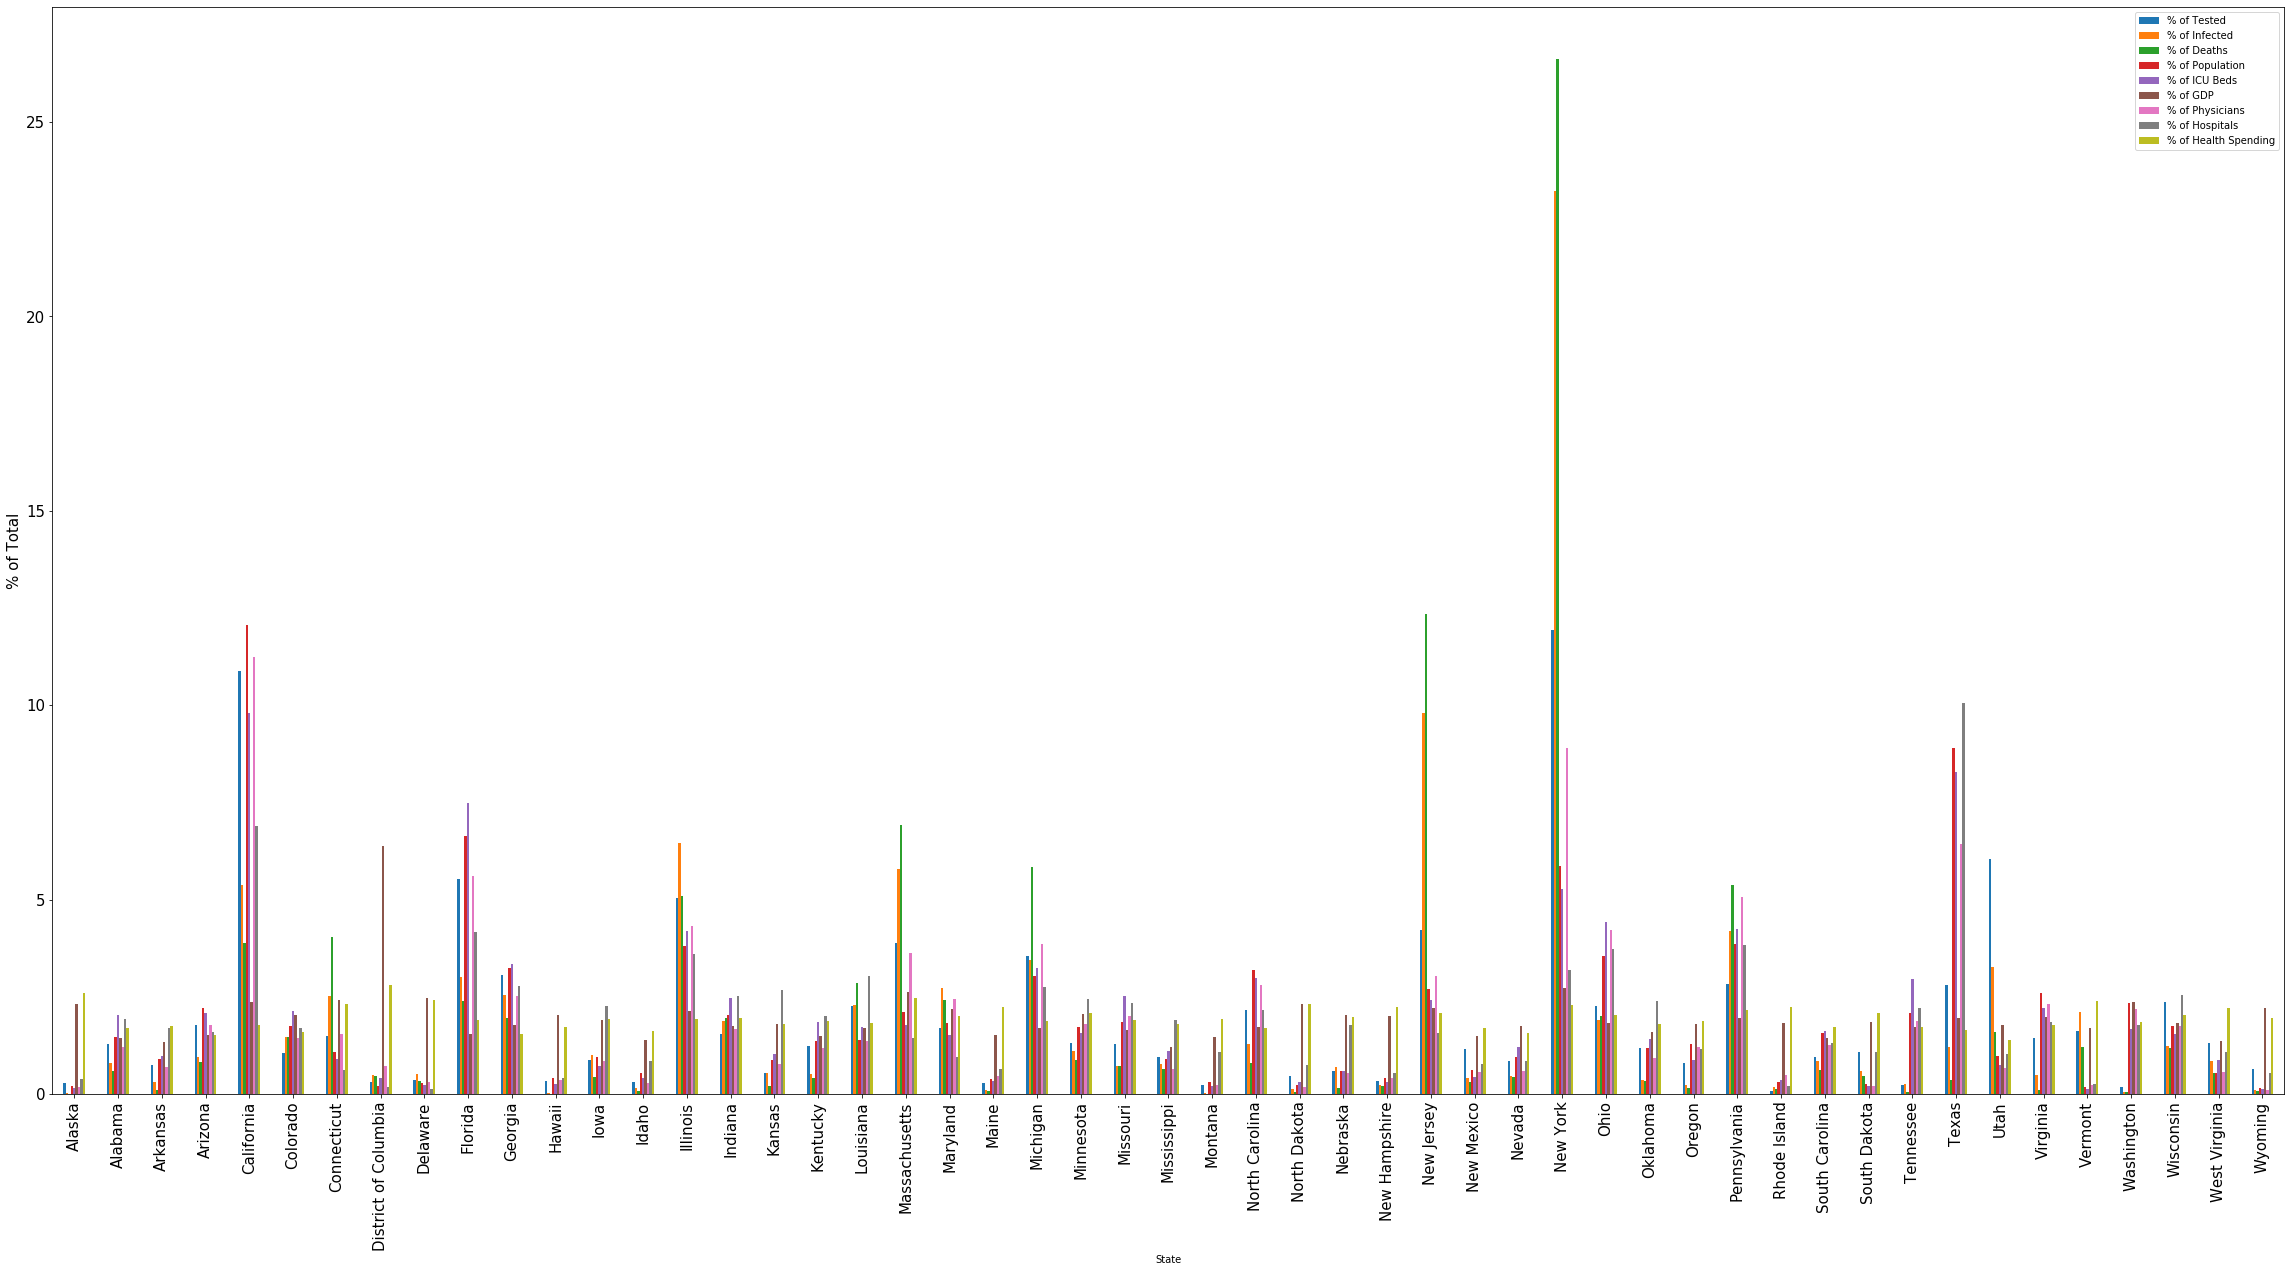

<Figure size 432x288 with 0 Axes>

In [11]:
# plot all columns for viewing and analyzing all together
ax = newnew.plot.bar(rot=90, figsize=(40,20), fontsize=15)
ax.set_ylabel('% of Total', fontsize=15)
plt.show()
plt.savefig('../plot_images/popVall.png')

In [12]:
csv_path = "../clean_data/county_data_merged.csv"
cov_county_df = pd.read_csv(csv_path, encoding="utf-8")

In [13]:
# reset State as index
ks_analysis = cov_county_df.set_index('State', drop=True)
ks_analysis

,County,Population_2018,Population_Density_Per_Square_Mile,Unemployment_rate_2018,Median_Household_Income_2018,Total_Male,Total_Female,Total_age0to17,Male_age0to17,Female_age0to17,...,Total_age65plus,Male_age65plus,Female_age65plus,Total_age85plusr,Male_age85plusr,Female_age85plusr,ICU_Beds,Aggregate_Transit_Score,cases,deaths
State,,,,,,,,,,,,,,,,,,,,,
US,United States,327167434.0,87.4,3.9,61937.0,161128679.0,166038755.0,73399342.0,37490849.0,35908493.0,...,52431193.0,23306818.0,29124375.0,6544503.0,2325693.0,4218810.0,NaN,NaN,NaN,NaN
AL,Autauga,55601.0,91.8,3.6,59338.0,26995.0,28606.0,13163.0,6726.0,6437.0,...,8653.0,3787.0,4866.0,871.0,329.0,542.0,6.0,0.0,221.0,4.0
AL,Baldwin,218022.0,114.6,3.6,57588.0,105657.0,112365.0,47110.0,23810.0,23300.0,...,44571.0,20681.0,23890.0,4304.0,1755.0,2549.0,51.0,368329051.0,290.0,9.0
AL,Barbour,24881.0,31.0,5.2,34382.0,13133.0,11748.0,5192.0,2630.0,2562.0,...,4832.0,2089.0,2743.0,472.0,148.0,324.0,5.0,0.0,167.0,1.0
AL,Bibb,22400.0,36.8,4.0,46064.0,11921.0,10479.0,4587.0,2399.0,2188.0,...,3690.0,1627.0,2063.0,363.0,108.0,255.0,0.0,158361697.0,75.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY,Sweetwater,43051.0,4.2,4.2,73315.0,22152.0,20899.0,11290.0,5773.0,5517.0,...,5214.0,2546.0,2668.0,471.0,160.0,311.0,10.0,0.0,30.0,0.0
WY,Teton,23081.0,5.3,3.0,99087.0,11909.0,11172.0,4239.0,2167.0,2072.0,...,3558.0,1796.0,1762.0,325.0,132.0,193.0,6.0,0.0,100.0,1.0
WY,Uinta,20299.0,10.1,4.4,63401.0,10285.0,10014.0,5844.0,3018.0,2826.0,...,2858.0,1417.0,1441.0,255.0,89.0,166.0,6.0,156203456.0,12.0,0.0


In [14]:
# sort and pull wanted data
ks_analysis=ks_analysis.loc['KS', ['County', 'Population_2018', 'cases', 'deaths']]
ks_analysis

,County,Population_2018,cases,deaths
State,,,,
KS,Allen,12444.0,NaN,NaN
KS,Anderson,7878.0,1.0,0.0
KS,Atchison,16193.0,20.0,0.0
KS,Barber,4472.0,1.0,0.0
KS,Barton,26111.0,45.0,1.0
...,...,...,...,...
KS,Washington,5420.0,NaN,NaN
KS,Wichita,2105.0,NaN,NaN
KS,Wilson,8665.0,1.0,0.0


In [15]:
# fill NaN values with 0
ks_analysis.fillna(0) 

,County,Population_2018,cases,deaths
State,,,,
KS,Allen,12444.0,0.0,0.0
KS,Anderson,7878.0,1.0,0.0
KS,Atchison,16193.0,20.0,0.0
KS,Barber,4472.0,1.0,0.0
KS,Barton,26111.0,45.0,1.0
...,...,...,...,...
KS,Washington,5420.0,0.0,0.0
KS,Wichita,2105.0,0.0,0.0
KS,Wilson,8665.0,1.0,0.0


In [16]:
# calculations and new DF
counties_pop = ks_analysis['Population_2018'].sum()
counties_cases = ks_analysis['cases'].sum()
counties_deaths = ks_analysis['deaths'].sum()

counties_analysis = pd.DataFrame({"County": ks_analysis['County'],
                               "% of Tested": (ks_analysis['Population_2018']/counties_pop)*100,
                               "% of Infected": (ks_analysis['cases']/counties_cases)*100,
                               "% of Deaths": (ks_analysis['deaths']/counties_deaths)*100,
                                })

In [17]:
# reset County as index
new_KS_analysis = counties_analysis.set_index('County', drop=True)

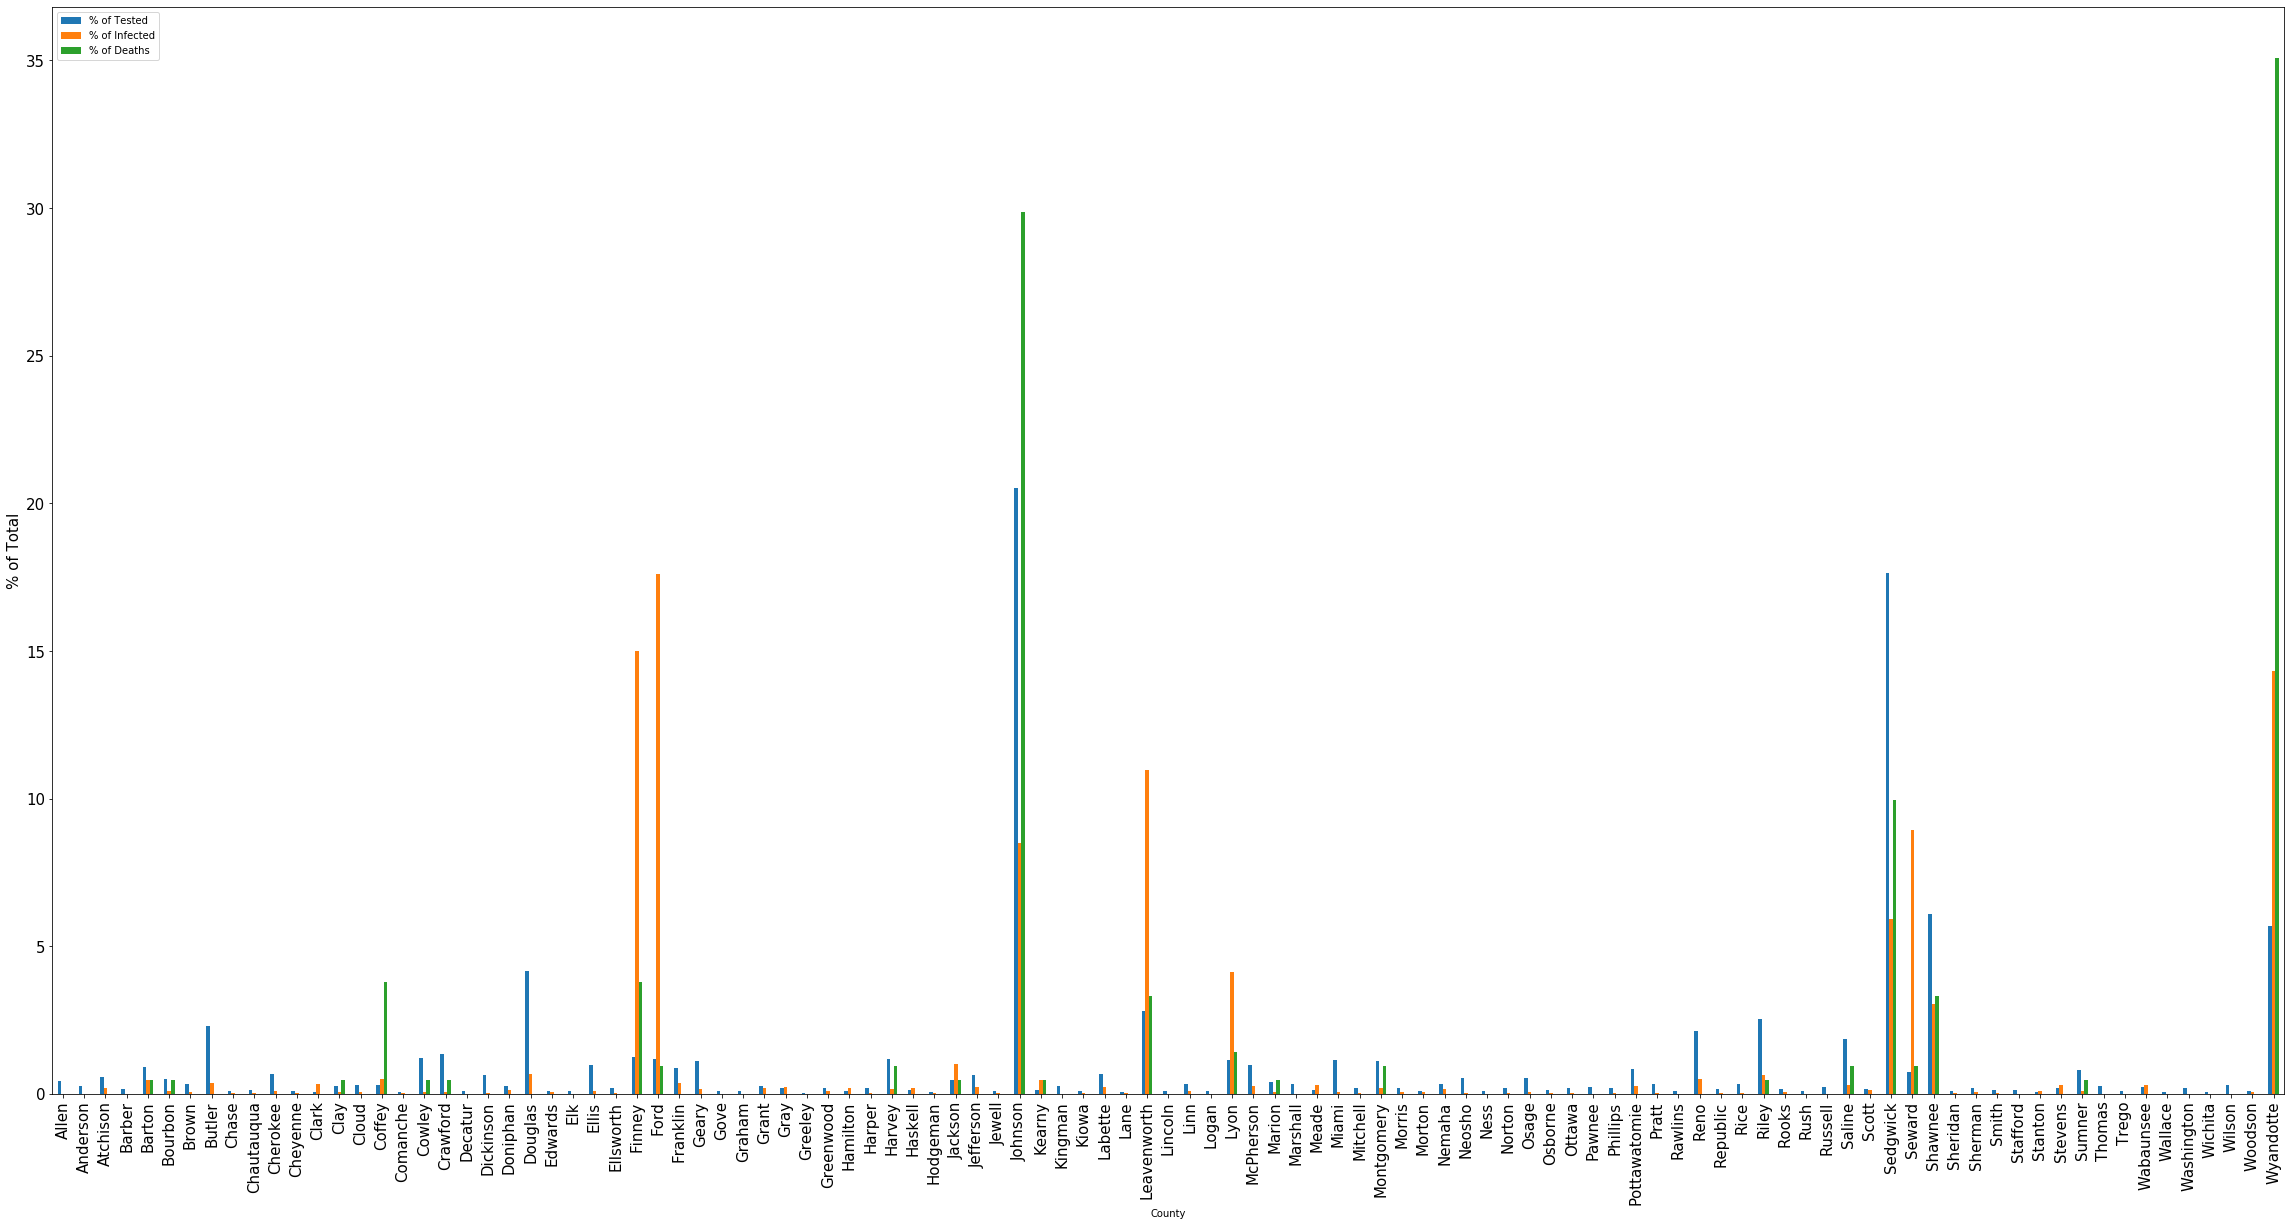

<Figure size 432x288 with 0 Axes>

In [18]:
# plot all columns for viewing and analyzing all together
ax7 = new_KS_analysis.plot.bar(rot=90, figsize=(40,20), fontsize=15)
ax7.set_ylabel('% of Total', fontsize=15)
plt.show()
plt.savefig('../plot_images/kscountyanalysis.png')

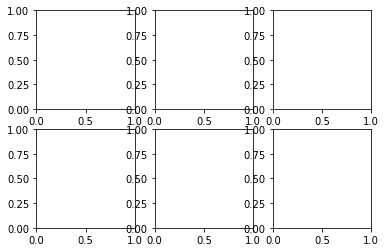

In [27]:
fig, ax = plt.subplots(2, 3,)